In [4]:
#from mylib import *
from hexalattice.hexalattice import *
import matplotlib.pyplot as plt

base_dir = "/mnt/z/Users/Kevin/Pictures/tbg/"

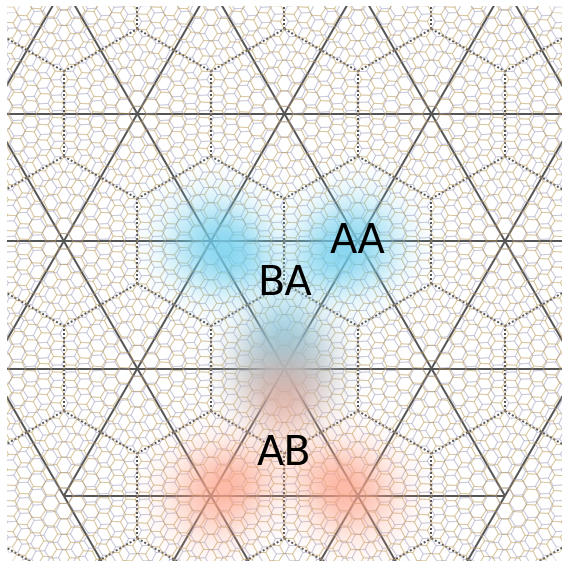

In [5]:
inverse_lattice = 6/180 * np.pi

fig, ax = plt.subplots(1, 1, figsize=[8, 8])

grid1, _ = create_hex_grid(
    nx=70,
    ny=70,
    rotate_deg=-33,
    min_diam=1,
)

grid2, _ = create_hex_grid(
    nx=70,
    ny=70,
    min_diam=1,
    rotate_deg=-27,
)

neworigin = 1 / inverse_lattice / np.sqrt(3)
latticeconstant = 1 / inverse_lattice / np.sqrt(3)

rad = ((grid1[:, 0])**2 + (grid1[:, 1] - neworigin)**2)**0.5
grid1 = grid1[rad.flatten() <= 25, :]
rad = ((grid2[:, 0])**2 + (grid2[:, 1] - neworigin)**2)**0.5
grid2 = grid2[rad.flatten() <= 25, :]

plot_single_lattice(grid1[:, 0], grid1[:, 1] - neworigin, face_color=None, edge_color=(150/255,147/255,181/255, 0.3), min_diam=1, plotting_gap=0, rotate_deg=-33, h_ax=ax)
plot_single_lattice(grid2[:, 0], grid2[:, 1] - neworigin, face_color=None, edge_color=(179/255,143/255,68/255, 0.3), min_diam=1, plotting_gap=0, rotate_deg=-27, h_ax=ax)



#plt.axvline(1 / inverse_lattice / 2)



from matplotlib.colors import LinearSegmentedColormap


X, Y = np.meshgrid(np.linspace(-5, 5, 1000), np.linspace(-5, 5, 1000))
R = 2
Z = np.exp(-(Y-R)**2 - X**2) + \
    np.exp(-(Y+R/2)**2 - (X+R*np.sqrt(3)/2)**2) + \
    np.exp(-(Y+R/2)**2 - (X-R*np.sqrt(3)/2)**2)
Z = Z / (X ** 2 + Y ** 2 + 0.7)

extent = 15

def to_rgba(hex, alpha):
    return ((hex >> 16) / 256, ((hex >> 8) & 0xFF) / 256, (hex & 0xFF) / 256, alpha)

colorAB = 0xfda58c
colorBA = 0x72d0ef

map_object = LinearSegmentedColormap.from_list(name='rainbow_alpha', colors=[ to_rgba(colorBA, 0), to_rgba(colorBA, 0.7),])
plt.register_cmap(cmap=map_object)
ax.imshow(Z, cmap='rainbow_alpha', extent=(-extent, extent, -extent, extent), zorder=1)

# map_object = LinearSegmentedColormap.from_list(name='rainbow_alpha', colors=[ to_rgba(colorBA, 0), to_rgba(colorBA, 1),])
# plt.register_cmap(cmap=map_object)
# ax.imshow(Z, cmap='rainbow_alpha', extent=(3 * np.sqrt(3) / 2 * latticeconstant -extent, 3 * np.sqrt(3) / 2 * latticeconstant +extent,
#                                            -latticeconstant / 2 + extent, -latticeconstant/ 2-extent), zorder=1)
map_object = LinearSegmentedColormap.from_list(name='rainbow_alpha', colors=[ to_rgba(colorAB, 0), to_rgba(colorAB, 0.7),])
plt.register_cmap(cmap=map_object)
ax.imshow(Z, cmap='rainbow_alpha', extent=(-extent, +extent,
                                           -2*latticeconstant + extent, -2*latticeconstant-extent), zorder=1)

map_object = LinearSegmentedColormap.from_list(name='rainbow_alpha', colors=[ to_rgba(colorBA, 0), to_rgba(colorBA, 0.4),])
plt.register_cmap(cmap=map_object)
ax.imshow(Z, cmap='rainbow_alpha', extent=(-extent, extent, -extent, extent), zorder=1)

map_object = LinearSegmentedColormap.from_list(name='rainbow_alpha', colors=[ to_rgba(colorAB, 0), to_rgba(colorAB, 0.2),])
plt.register_cmap(cmap=map_object)
ax.imshow(Z, cmap='rainbow_alpha', extent=(-extent, +extent,
                                           -2*latticeconstant + extent, -2*latticeconstant-extent), zorder=1)



def draw_hexalattice():
    from matplotlib import collections as mc
    Hexa = []
    HexaLines = []

    for y in range(-3, 3, 1):
        for x in range(6 - abs(y)):
            Hexa.append((latticeconstant * np.sqrt(3) * (x - 1/2 - 2) + latticeconstant * np.sqrt(3) / 2 * abs(y),
                         latticeconstant *  np.sqrt(3) * y * np.sqrt(3) / 2 + latticeconstant / 2))
            if x != 0:
                HexaLines.append((len(Hexa) - 2, len(Hexa) - 1))
            if y > 0:
                HexaLines.append((len(Hexa) - 1, len(Hexa) - (6 - abs(y) + 1)))
                HexaLines.append((len(Hexa) - 1, len(Hexa) - (6 - abs(y) + 2)))
            if y < 0:
                HexaLines.append((len(Hexa) - 1, len(Hexa) + (6 - abs(y))))
                HexaLines.append((len(Hexa) - 1, len(Hexa) + (6 - abs(y) - 1)))

    ax.add_collection(mc.LineCollection([(Hexa[x], Hexa[y]) for x, y in HexaLines], color='#555555', lw=2, zorder=0.5))
    
    
def draw_duallattice():
    from matplotlib import collections as mc
    Dual = []
    DualLines = []

    for y in range(-3, 4):
        if y == 3: lim = (0, 5)
        elif y == 2: lim = (-2, 9)
        elif y == 1: lim = (-1, 10)
        elif y == 0: lim = (0, 11)
        elif y == -1: lim = (-1, 10)
        elif y == -2: lim = (-1, 8)
        else: lim = (1, 4)
            
        for x in range(*lim):
            Dual.append(
                (
                    latticeconstant * np.sqrt(3) * (x - 5) / 2 + latticeconstant * np.sqrt(3) / 2 * abs(y),
                    (latticeconstant * np.sqrt(3) * y * np.sqrt(3) / 2 -
                         (latticeconstant * np.sqrt(3) / np.sqrt(3) if x % 2 == 0 else latticeconstant * np.sqrt(3) * np.sqrt(3) / 2 - latticeconstant * np.sqrt(3) / np.sqrt(3))
                    ) +  latticeconstant / 2
                )
            )
            if x != lim[0]:
                DualLines.append((len(Dual) - 2, len(Dual) - 1))

    for i in range(2):
        DualLines.append((i * 2, i * 2 + 6))
        
    for i in range(5):
        DualLines.append((3 + i * 2, 3 + i * 2 + 10))
        
    for i in range(6):
        DualLines.append((12 + i * 2, 12 + i * 2 + 11))
        DualLines.append((34 + i * 2, 34 + i * 2 + 11))
    
    for i in range(5):
        DualLines.append((24 + i * 2, 24 + i * 2 + 11))
    
    for i in range(3):
        DualLines.append((48 + i * 2, 48 + i * 2 + 8))
                
    ax.add_collection(mc.LineCollection([(Dual[x], Dual[y]) for x, y in DualLines], color='#555555', lw=2, ls=(0, (1, 1)), zorder=0.5))

    
draw_hexalattice()
draw_duallattice()
ax.set_xlim([-28, 28])
ax.set_ylim([-28, 28])

ax.set_xlim([-18, 18])
ax.set_ylim([-18, 18])

ax.text(0, 0, "BA", horizontalalignment="center", verticalalignment="center", fontsize=40)
ax.text(0, -2*latticeconstant, "AB", horizontalalignment="center", verticalalignment="center", fontsize=40)
ax.text(latticeconstant/2*np.sqrt(3), latticeconstant/2, "AA", horizontalalignment="center", verticalalignment="center", fontsize=40)

ax.axis('off')

plt.tight_layout()
plt.savefig(base_dir + "wannier.png", dpi=100)
plt.savefig(base_dir + "wannier.svg", dpi=100)


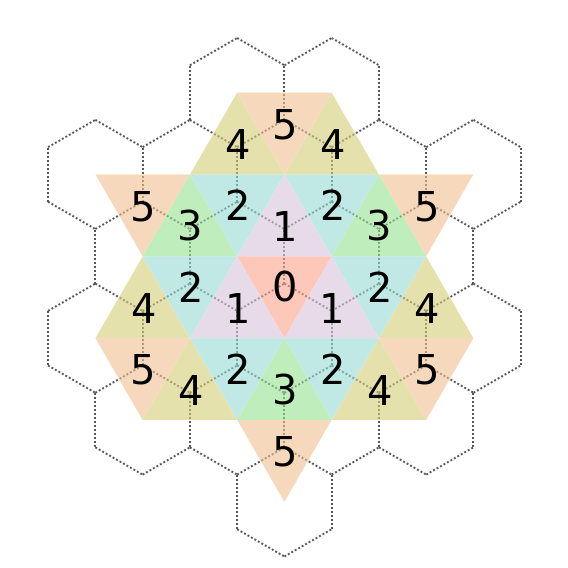

In [12]:
fig, ax = plt.subplots(1, 1, figsize=[8, 8])
ax.set_xlim([-28, 28])
ax.set_ylim([-28, 28])

import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = "DejaVu Sans"

def adddowntri(xy, color, name):
    xy = (
        xy[0] * np.sqrt(3) * latticeconstant + xy[1] * np.sqrt(3) * latticeconstant / 2,
        xy[1] * np.sqrt(3) * latticeconstant * np.sqrt(3) / 2
    )
    polygon = mpatches.RegularPolygon(xy, numVertices=3,
        radius=latticeconstant,
        orientation=np.pi, facecolor=color)
    
    ax.text(xy[0], xy[1] - latticeconstant * 0.12, name + "", fontsize=40, horizontalalignment='center', verticalalignment='center', zorder=1)

    ax.add_patch(polygon)
    
def adduptri(xy, color, name):
    xy = (
        (xy[0] + 1/2) * np.sqrt(3) * latticeconstant + xy[1] * np.sqrt(3) * latticeconstant / 2,
        xy[1] * np.sqrt(3) * latticeconstant * np.sqrt(3) / 2 - latticeconstant / 2
    )
    polygon = mpatches.RegularPolygon(xy, numVertices=3,
        radius=latticeconstant,
        orientation=0, facecolor=color)
    
    ax.text(xy[0], xy[1], name + "", fontsize=40, horizontalalignment='center', verticalalignment='center', zorder=1)

    ax.add_patch(polygon)

trialpha = 0.6
adddowntri((0, 0), to_rgba(colorAB, 0.6), "0")

color1 = 0xdbc4dc
color2 = 0x98dcd5
color3 = 0x96e291
color4 = 0xd6cf78
color5 = 0xf1c192


adduptri((0, 0), to_rgba(color1, trialpha), "1")
adduptri((-1, 0), to_rgba(color1, trialpha), "1")
adduptri((-1, 1), to_rgba(color1, trialpha), "1")

adddowntri((1, 0), to_rgba(color2, trialpha), "2")
adddowntri((-1, 0), to_rgba(color2, trialpha), "2")
adddowntri((0, 1), to_rgba(color2, trialpha), "2")
adddowntri((-1, 1), to_rgba(color2, trialpha), "2")
adddowntri((1, -1), to_rgba(color2, trialpha), "2")
adddowntri((0, -1), to_rgba(color2, trialpha), "2")

adduptri((0, 1), to_rgba(color3, trialpha), "3")
adduptri((-2, 1), to_rgba(color3, trialpha), "3")
adduptri((0, -1), to_rgba(color3, trialpha), "3")

adduptri((-1, 2), to_rgba(color4, trialpha), "4")
adduptri((-2, 2), to_rgba(color4, trialpha), "4")
adduptri((1, 0), to_rgba(color4, trialpha), "4")
adduptri((-2, 0), to_rgba(color4, trialpha), "4")
adduptri((1, -1), to_rgba(color4, trialpha), "4")
adduptri((-1, -1), to_rgba(color4, trialpha), "4")

adddowntri((-1, 2), to_rgba(color5, trialpha), "5")
adddowntri((-2, 1), to_rgba(color5, trialpha), "5")
adddowntri((1, 1), to_rgba(color5, trialpha), "5")
adddowntri((-1, -1), to_rgba(color5, trialpha), "5")
adddowntri((2, -1), to_rgba(color5, trialpha), "5")
adddowntri((1, -2), to_rgba(color5, trialpha), "5")


ax.axis('off')
ax.set_aspect('equal')
draw_duallattice()
plt.tight_layout()
plt.savefig(base_dir + "distances.png", dpi=100)
plt.savefig(base_dir + "distances.svg", dpi=100)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=[8, 8])
ax.set_xlim([-28, 28])
ax.set_ylim([-28, 28])

import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = "DejaVu Sans"

def adddowntri(xy, color, name):
    xy = (
        xy[0] * np.sqrt(3) * latticeconstant + xy[1] * np.sqrt(3) * latticeconstant / 2,
        xy[1] * np.sqrt(3) * latticeconstant * np.sqrt(3) / 2
    )
    polygon = mpatches.RegularPolygon(xy, numVertices=3,
        radius=latticeconstant,
        orientation=np.pi, facecolor=color)
    
    ax.text(xy[0], xy[1] - latticeconstant * 0.12, name + "", fontsize=40, horizontalalignment='center', verticalalignment='center', zorder=1)

    ax.add_patch(polygon)
    
def adduptri(xy, color, name):
    xy = (
        (xy[0] + 1/2) * np.sqrt(3) * latticeconstant + xy[1] * np.sqrt(3) * latticeconstant / 2,
        xy[1] * np.sqrt(3) * latticeconstant * np.sqrt(3) / 2 - latticeconstant / 2
    )
    polygon = mpatches.RegularPolygon(xy, numVertices=3,
        radius=latticeconstant,
        orientation=0, facecolor=color)
    
    ax.text(xy[0], xy[1], name + "", fontsize=40, horizontalalignment='center', verticalalignment='center', zorder=1)

    ax.add_patch(polygon)

trialpha = 0.6
adddowntri((0, 0), to_rgba(colorAB, 0.6), "0")

color1 = 0xdbc4dc
color2 = 0x98dcd5
color3 = 0x96e291
color4 = 0xd6cf78
color5 = 0xf1c192


adduptri((0, 0), to_rgba(color1, trialpha), "1")
adduptri((-1, 0), to_rgba(color1, trialpha), "1")
adduptri((-1, 1), to_rgba(color1, trialpha), "1")

adddowntri((1, 0), to_rgba(color2, trialpha), "2")
adddowntri((-1, 0), to_rgba(color2, trialpha), "2")
adddowntri((0, 1), to_rgba(color2, trialpha), "2")
adddowntri((-1, 1), to_rgba(color2, trialpha), "2")
adddowntri((1, -1), to_rgba(color2, trialpha), "2")
adddowntri((0, -1), to_rgba(color2, trialpha), "2")

adduptri((0, 1), to_rgba(color3, trialpha), "3")
adduptri((-2, 1), to_rgba(color3, trialpha), "3")
adduptri((0, -1), to_rgba(color3, trialpha), "3")

adduptri((-1, 2), to_rgba(color4, trialpha), "4")
adduptri((-2, 2), to_rgba(color4, trialpha), "4")
adduptri((1, 0), to_rgba(color4, trialpha), "4")
adduptri((-2, 0), to_rgba(color4, trialpha), "4")
adduptri((1, -1), to_rgba(color4, trialpha), "4")
adduptri((-1, -1), to_rgba(color4, trialpha), "4")

adddowntri((-1, 2), to_rgba(color5, trialpha), "5")
adddowntri((-2, 1), to_rgba(color5, trialpha), "5")
adddowntri((1, 1), to_rgba(color5, trialpha), "5")
adddowntri((-1, -1), to_rgba(color5, trialpha), "5")
adddowntri((2, -1), to_rgba(color5, trialpha), "5")
adddowntri((1, -2), to_rgba(color5, trialpha), "5")


ax.axis('off')
ax.set_aspect('equal')
draw_duallattice()
plt.tight_layout()
plt.savefig(base_dir + "distances.png", dpi=100)
plt.savefig(base_dir + "distances.svg", dpi=100)

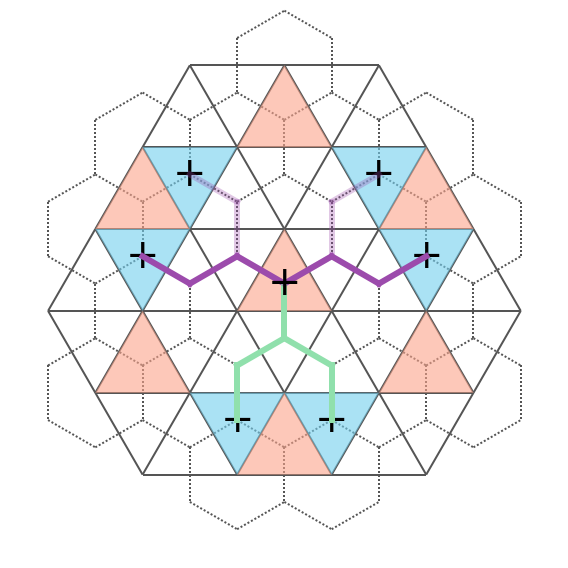

In [9]:
fig, ax = plt.subplots(1, 1, figsize=[8, 8])
ax.set_xlim([-28, 28])
ax.set_ylim([-28, 28])

import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = "DejaVu Sans"


def adddowntri(xy, color, name):
    xy = (
        xy[0] * np.sqrt(3) * latticeconstant + xy[1] * np.sqrt(3) * latticeconstant / 2,
        xy[1] * np.sqrt(3) * latticeconstant * np.sqrt(3) / 2
    )
    polygon = mpatches.RegularPolygon(xy, numVertices=3,
        radius=latticeconstant,
        orientation=np.pi, facecolor=color)
    
    ax.text(xy[0], xy[1] - latticeconstant * 0, name + "", fontsize=40, horizontalalignment='center', verticalalignment='center', zorder=4)

    ax.add_patch(polygon)
    
def adduptri(xy, color, name):
    xy = (
        (xy[0] + 1/2) * np.sqrt(3) * latticeconstant + xy[1] * np.sqrt(3) * latticeconstant / 2,
        xy[1] * np.sqrt(3) * latticeconstant * np.sqrt(3) / 2 - latticeconstant / 2
    )
    polygon = mpatches.RegularPolygon(xy, numVertices=3,
        radius=latticeconstant,
        orientation=0, facecolor=color)
    
    ax.text(xy[0], xy[1], name + "", fontsize=40, horizontalalignment='center', verticalalignment='center', zorder=1)

    ax.add_patch(polygon)

def lineupdown(xy1, xy2):
    xy1 = (
        xy1[0] * np.sqrt(3) * latticeconstant + xy1[1] * np.sqrt(3) * latticeconstant / 2,
        xy1[1] * np.sqrt(3) * latticeconstant * np.sqrt(3) / 2
    )
    xy2 = (
        (xy2[0] + 1/2) * np.sqrt(3) * latticeconstant + xy2[1] * np.sqrt(3) * latticeconstant / 2,
        xy2[1] * np.sqrt(3) * latticeconstant * np.sqrt(3) / 2 - latticeconstant / 2
    )
    ax.plot([xy1[0], xy2[0]], [xy1[1], xy2[1]], color=to_rgba(color4, 1), lw=5, zorder=1.5)

trialpha = 0.6
adddowntri((1, -2), to_rgba(colorAB, 0.6), "")
adddowntri((2, -1), to_rgba(colorAB, 0.6), "")
adddowntri((-1, -1), to_rgba(colorAB, 0.6), "")
adddowntri((0, 0), to_rgba(colorAB, 0.6), "+")
adddowntri((-2, 1), to_rgba(colorAB, 0.6), "")
adddowntri((1, 1), to_rgba(colorAB, 0.6), "")
adddowntri((-1, 2), to_rgba(colorAB, 0.6), "")

color1 = 0xfe9a04
color2 = 0xabc318
#color3 = 0x1fd599
#color4 = 0x94bed4
#color4 = 0x1fd599
color4 = 0x9d4bad


def j4bondline(xy1, xy2, color=None):
    xy1 = (
        xy1[0] * np.sqrt(3) * latticeconstant + xy1[1] * np.sqrt(3) * latticeconstant / 2,
        xy1[1] * np.sqrt(3) * latticeconstant * np.sqrt(3) / 2
    )
    xy2 = (
        (xy2[0] + 1/2) * np.sqrt(3) * latticeconstant + xy2[1] * np.sqrt(3) * latticeconstant / 2,
        xy2[1] * np.sqrt(3) * latticeconstant * np.sqrt(3) / 2 - latticeconstant / 2
    )
    j4bondlineabs(xy1, xy2, 6, latticeconstant, color=color)

def j4bondlineabs(xy1, xy2, thick, latcon, do=[0, 1, 2], color=None):
    if color is None:
        color = to_rgba(color4, 1)
        
    if xy1[1] > xy2[1]:
        xy1, xy2 = xy2, xy1
        
    if abs(xy1[1] - xy2[1]) > 2 * abs(xy1[0] - xy2[0]):
        if 0 in do: ax.plot([xy1[0], xy1[0]], [xy1[1], xy1[1] + latcon], lw=thick, color=color, zorder=3)
        if 2 in do: ax.plot([xy2[0], xy2[0]], [xy2[1], xy2[1] - latcon], lw=thick, color=color, zorder=3)
        if 1 in do: ax.plot([xy1[0], xy2[0]], [xy1[1] + latcon, xy2[1] - latcon], lw=thick, color=color, zorder=3) 
    elif xy1[0] > xy2[0]:
        if 0 in do: ax.plot([xy1[0], xy1[0] - latcon*np.sqrt(3)/2], [xy1[1], xy1[1] + latcon/2], lw=thick, color=color, zorder=3)
        if 2 in do: ax.plot([xy2[0], xy2[0] + latcon*np.sqrt(3)/2], [xy2[1], xy2[1] - latcon/2], lw=thick, color=color, zorder=3)
        if 1 in do: ax.plot([xy1[0] - latcon*np.sqrt(3)/2, xy2[0] + latcon*np.sqrt(3)/2],
                    [xy1[1] + latcon/2, xy2[1] - latcon/2], lw=thick, color=color, zorder=3)
    else:
        if 0 in do: ax.plot([xy1[0], xy1[0] + latcon*np.sqrt(3)/2], [xy1[1], xy1[1] + latcon/2], lw=thick, color=color, zorder=3)
        if 2 in do: ax.plot([xy2[0], xy2[0] - latcon*np.sqrt(3)/2], [xy2[1], xy2[1] - latcon/2], lw=thick, color=color, zorder=3)
        if 1 in do: ax.plot([xy1[0] + latcon*np.sqrt(3)/2, xy2[0] - latcon*np.sqrt(3)/2],
                    [xy1[1] + latcon/2, xy2[1] - latcon/2], lw=thick, color=color, zorder=3) 
        
        


adduptri((-1, 2), to_rgba(colorBA, trialpha), "+")
adduptri((-2, 2), to_rgba(colorBA, trialpha), "+")
adduptri((1, 0), to_rgba(colorBA, trialpha), "+")
adduptri((-2, 0), to_rgba(colorBA, trialpha), "+")
adduptri((1, -1), to_rgba(colorBA, trialpha), "+")
adduptri((-1, -1), to_rgba(colorBA, trialpha), "+")
                     
j4bondline((0, 0), (1, 0))
j4bondline((0, 0), (-2, 0))
j4bondline((0, 0), (-1, 2), color=to_rgba(color3, 1))
j4bondline((0, 0), (-2, 2), color=to_rgba(color3, 1))
j4bondline((0, 0), (1, -1), color=to_rgba(color4, 0.3))
j4bondline((0, 0), (-1, -1), color=to_rgba(color4, 0.3))


ax.axis('off')
ax.set_aspect('equal')
draw_duallattice()
draw_hexalattice()
plt.tight_layout()
ax.invert_yaxis()
plt.savefig(base_dir + "j4tri.png", dpi=100)
plt.savefig(base_dir + "j4tri.svg", dpi=100)

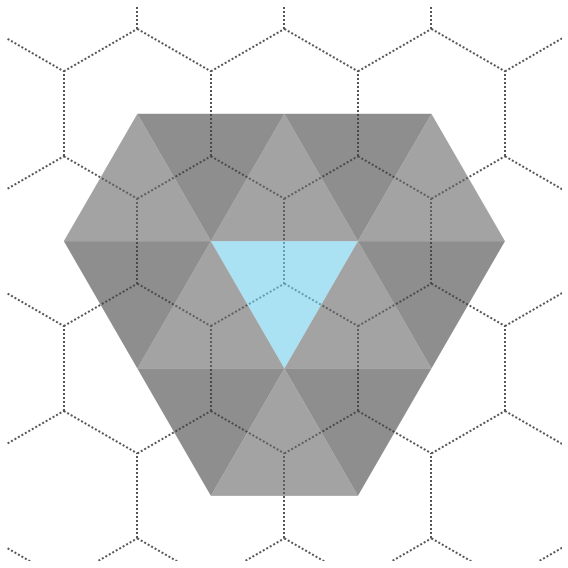

In [630]:
fig, ax = plt.subplots(1, 1, figsize=[8, 8])
ax.set_xlim([-28, 28])
ax.set_ylim([-28, 28])

adddowntri((0, 0), to_rgba(colorBA, 0.6), "")

colorgray = 0x666666
colorgray2 = 0x444444

adduptri((0, 0), to_rgba(colorgray, trialpha), "")
adduptri((-1, 0), to_rgba(colorgray, trialpha), "")
adduptri((-1, 1), to_rgba(colorgray, trialpha), "")

adddowntri((1, 0), to_rgba(colorgray2, trialpha), "")
adddowntri((-1, 0), to_rgba(colorgray2, trialpha), "")
adddowntri((0, 1), to_rgba(colorgray2, trialpha), "")
adddowntri((-1, 1), to_rgba(colorgray2, trialpha), "")
adddowntri((1, -1), to_rgba(colorgray2, trialpha), "")
adddowntri((0, -1), to_rgba(colorgray2, trialpha), "")

adduptri((0, 1), to_rgba(colorgray, trialpha), "")
adduptri((-2, 1), to_rgba(colorgray, trialpha), "")
adduptri((0, -1), to_rgba(colorgray, trialpha), "")

ax.axis('off')
ax.set_aspect('equal')
draw_duallattice()
ax.set_xlim([-18, 18])
ax.set_ylim([-18, 18])
plt.tight_layout()
plt.savefig(base_dir + "overlap.png", dpi=100)
plt.savefig(base_dir + "overlap.svg", dpi=100)

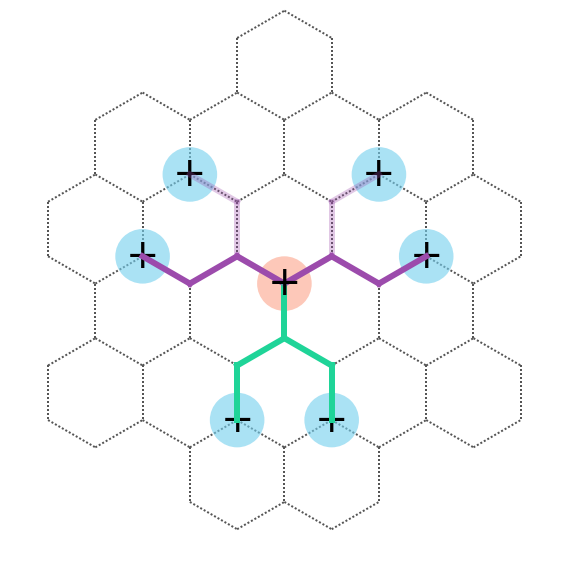

In [636]:
fig, ax = plt.subplots(1, 1, figsize=[8, 8])
ax.set_xlim([-28, 28])
ax.set_ylim([-28, 28])

import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = "DejaVu Sans"


def adddowntri(xy, color, name):
    xy = (
        xy[0] * np.sqrt(3) * latticeconstant + xy[1] * np.sqrt(3) * latticeconstant / 2,
        xy[1] * np.sqrt(3) * latticeconstant * np.sqrt(3) / 2
    )
    ax.add_patch(mpatches.Circle(xy, radius=latticeconstant/2, facecolor=color))
    
    ax.text(xy[0], xy[1] - latticeconstant * 0, name + "", fontsize=40, horizontalalignment='center', verticalalignment='center', zorder=4)
    
def adduptri(xy, color, name):
    xy = (
        (xy[0] + 1/2) * np.sqrt(3) * latticeconstant + xy[1] * np.sqrt(3) * latticeconstant / 2,
        xy[1] * np.sqrt(3) * latticeconstant * np.sqrt(3) / 2 - latticeconstant / 2
    )
    ax.add_patch(mpatches.Circle(xy, radius=latticeconstant/2, facecolor=color))
    
    ax.text(xy[0], xy[1], name + "", fontsize=40, horizontalalignment='center', verticalalignment='center', zorder=1)

adddowntri((0, 0), to_rgba(colorAB, trialpha), "+")
adduptri((-1, 2), to_rgba(colorBA, trialpha), "+")
adduptri((-2, 2), to_rgba(colorBA, trialpha), "+")
adduptri((1, 0), to_rgba(colorBA, trialpha), "+")
adduptri((-2, 0), to_rgba(colorBA, trialpha), "+")
adduptri((1, -1), to_rgba(colorBA, trialpha), "+")
adduptri((-1, -1), to_rgba(colorBA, trialpha), "+")
                     
j4bondline((0, 0), (1, 0))
j4bondline((0, 0), (-2, 0))
j4bondline((0, 0), (-1, 2), color=to_rgba(color3, 1))
j4bondline((0, 0), (-2, 2), color=to_rgba(color3, 1))
j4bondline((0, 0), (1, -1), color=to_rgba(color4, 0.3))
j4bondline((0, 0), (-1, -1), color=to_rgba(color4, 0.3))


ax.axis('off')
ax.set_aspect('equal')
draw_duallattice()
#draw_hexalattice()
plt.tight_layout()
ax.invert_yaxis()
plt.savefig(base_dir + "j4hex.png", dpi=100)
plt.savefig(base_dir + "j4hex.svg", dpi=100)

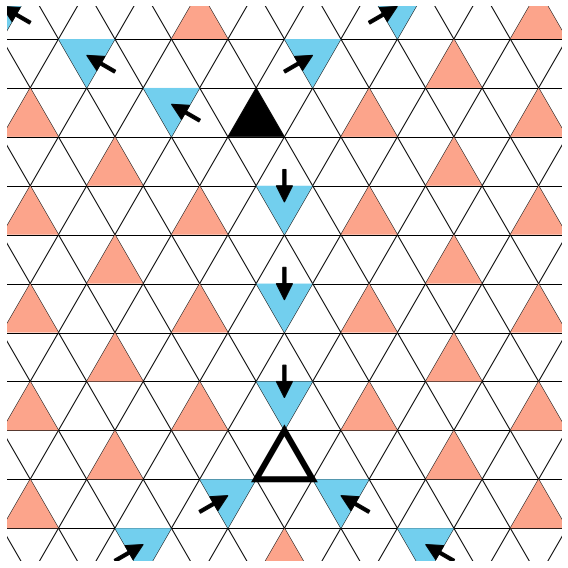

In [638]:
R = 1

def draw_hexalattice(color=None):
    from matplotlib import collections as mc
    Hexa = []
    HexaLines = []

    for y in range(-8, 9, 1):
        xlen = 20
        xrange = (-(y // 2) - xlen // 2, -(y // 2) + xlen - xlen // 2)
        
        for x in range(xrange[0], xrange[1]):
            Hexa.append((R * np.sqrt(3) * x + R * np.sqrt(3) / 2 * y,
                         R *  np.sqrt(3) * y * np.sqrt(3) / 2 + R / 2))
            
            if x != xrange[0]:
                HexaLines.append((len(Hexa) - 2, len(Hexa) - 1))
            
            if y % 2 == 1:
                HexaLines.append((len(Hexa) - 1, len(Hexa) - xlen - 1))
                if x < xrange[1] - 1:
                    HexaLines.append((len(Hexa) - 1, len(Hexa) - xlen))
            elif y > -8:
                HexaLines.append((len(Hexa) - 1, len(Hexa) - xlen - 1))
                if x > xrange[0]:
                    HexaLines.append((len(Hexa) - 1, len(Hexa) - xlen - 2))
                

    ax.add_collection(mc.LineCollection([(Hexa[x], Hexa[y]) for x, y in HexaLines], color=color, lw=1, zorder=0.5))
    
def trilatloc(xy, updown):
    return (
        (xy[0] + 1/2) * np.sqrt(3) * R + xy[1] * np.sqrt(3) * R / 2,
        xy[1] * np.sqrt(3) * R * np.sqrt(3) / 2
    ) if updown == "down" else (
        xy[0] * np.sqrt(3) * R + xy[1] * np.sqrt(3) * R / 2,
        xy[1] * np.sqrt(3) * R * np.sqrt(3) / 2 - R / 2
    )

def draw_duallattice(color=None):
    for x in range(-10, 10):
        for y in range(-10, 10):
            xy = trilatloc((x, y), "down")
            xy = (xy[0] - R * np.sqrt(3) / 2, xy[1] + R / 2)
            ax.add_patch(mpatches.RegularPolygon(xy, numVertices=6, radius=R, zorder=-0.5, lw=1, fill=False, edgecolor=color))

def adddowntri(xy, name, **kwargs):
    xy = trilatloc(xy, "down")
    polygon = mpatches.RegularPolygon(xy, numVertices=3,
        radius=R,
        orientation=np.pi, **kwargs)
    
    #ax.text(xy[0], xy[1], str(name), fontsize=12, horizontalalignment='center', verticalalignment='center', bbox=dict(color='white'), zorder=1, clip_on=True)

    ax.add_patch(polygon)
    
def adduptri(xy, name, **kwargs):
    xy = trilatloc(xy, "up")
    polygon = mpatches.RegularPolygon(xy, numVertices=3,
        radius=R,
        orientation=0, **kwargs)
    
    #ax.text(xy[0], xy[1], str(name), fontsize=12, horizontalalignment='center', verticalalignment='center', bbox=dict(color='white'), zorder=1, clip_on=True)

    ax.add_patch(polygon)
    
def addarrow(downxy, upxy):
    downxy = trilatloc(downxy, "down")
    upxy = trilatloc(upxy, "up")
    
    ax.add_patch(mpatches.FancyArrow(upxy[0], upxy[1], downxy[0] - upxy[0], downxy[1] - upxy[1], color="black", width=0.10, head_width=0.5, head_length=0.5, length_includes_head=True))    



import functools

rt3 = \
[
    (-4, 5), (2, 5),
    (-8, 4), (1, 4), (4, 4),
    (-6, 3), (-0, 3), (3, 3),
    (-7, 2), (-4, 2), (2, 2), (5, 2)
] + \
functools.reduce(lambda a, x: a + x, [
    [(x - i, y + 2 * i) for x, y in
        [
            (-3, -3), (0, -3), (3, -3), (6, -3),
            (-4, -4), (-1, -4), (5, -4), (8, -4),
        ]
    ] for i in range(3)
], []) + \
[
    (-2, -5), (7, -5), 
    (-3, -6), (3, -6), (9, -6)
]


boundary = [
    (-8, 5), (-1, 5),
    (-6, 4), (-2, 4),
    (-4, 3),
    (-1, 1),
    (0, -1),
    (1, -3),
    (1, -5), (3, -5),
    (0, -6), (5, -6)
]

displacedrt3 = [
    (-7, 5), (-1, 5),
    (-5, 4), (-2, 4),
    (-3, 3),
    (-1, 2),
    (0, 0),
    (1, -2),
    (1, -5), (4, -5),
    (0, -6), (6, -6),
]

colorDisplaced = 0xfdb6bd
    
fig, ax = plt.subplots(1, 1, figsize=[8, 8])

for i in rt3:
    adduptri(i, "", facecolor=to_rgba(colorAB, 1))

for i, j in zip(boundary, displacedrt3):
    adddowntri(i, "", facecolor=to_rgba(colorBA, 1))
    #adduptri(j, "", facecolor=to_rgba(colorDisplaced, 1))
    addarrow(i, j)
    
adduptri((-2, 3), "", facecolor="k")
adduptri((2, -4), "", facecolor="w", edgecolor="k", lw=6)

ax.set_xlim([-8.5, 8.5])
ax.set_ylim([-9.5, 7.5])
ax.axis("off")
draw_hexalattice()

plt.tight_layout()
plt.savefig(base_dir + "junctions.png", dpi=100)
plt.savefig(base_dir + "junctions.svg", dpi=100)

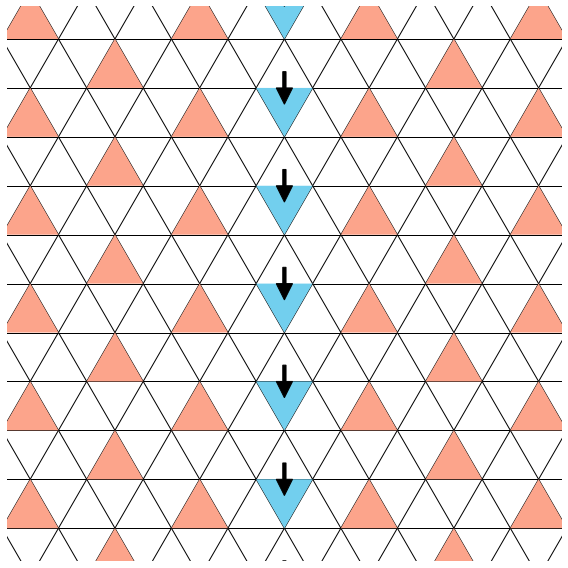

In [639]:
rt3 = \
functools.reduce(lambda a, x: a + x, [
    [(x - i, y + 2 * i) for x, y in
        [
            (-3, -3), (0, -3), (3, -3), (6, -3),
            (-4, -4), (-1, -4), (5, -4), (8, -4),
        ]
    ] for i in range(-4, 6)
], [])


boundary = [
    (-4, 7),
    (-3, 5),
    (-2, 3),
    (-1, 1),
    (0, -1),
    (1, -3),
    (2, -5),
    (3, -7),
]

displacedrt3 = [
    (-4, 8),
    (-3, 6),
    (-2, 4),
    (-1, 2),
    (0, 0),
    (1, -2),
    (2, -4),
    (3, -6),
]

    
fig, ax = plt.subplots(1, 1, figsize=[8, 8])

for i in rt3:
    adduptri(i, "", facecolor=to_rgba(colorAB, 1))

for i, j in zip(boundary, displacedrt3):
    adddowntri(i, "", facecolor=to_rgba(colorBA, 1))
    #adduptri(j, "", facecolor=to_rgba(colorDisplaced, 1))
    addarrow(i, j)

ax.set_xlim([-8.5, 8.5])
ax.set_ylim([-9.5, 7.5])
ax.axis("off")
draw_hexalattice()
plt.tight_layout()
plt.savefig(base_dir + "flipline.png", dpi=100)
plt.savefig(base_dir + "flipline.svg", dpi=100)

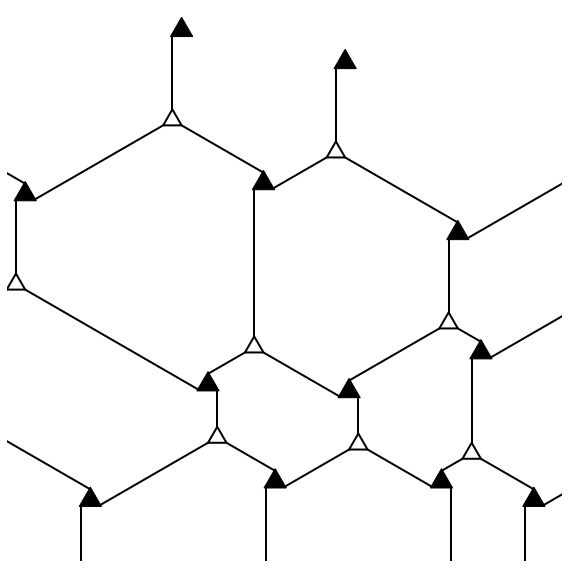

In [640]:
fig, ax = plt.subplots(1, 1, figsize=[8, 8])

trilen = 0.5
trirad = trilen / np.sqrt(3)
points = [(-5, 0), (0, 0), (5, 0), (7, 0)]

lines = []
opentris = []
closedtris = []

def grow(lengths, lrs):
    newpts = []
    for pt, length, lr in zip(points, lengths, lrs):
        lines.append((pt[0], pt[1], pt[0], pt[1] + length))
        closedtris.append((pt[0] + lr * trilen / 2, pt[1] + length + trilen / np.sqrt(3) / 2))
        
        
        a = (pt[0] + lr * trilen / 2, pt[1] + length + trilen * np.sqrt(3) / 2)
        b = (pt[0] + lr * trilen, pt[1] + length)
    
        if lr > 0:
            newpts += [a, b]
        else:
            newpts += [b, a]
            
    return newpts


def merge(llen, rlen):
    newpts = []
    newpts.append((points[0][0] - llen * np.cos(np.pi/6), points[0][1] + llen * np.sin(np.pi/6)))
    lines.append((points[0][0], points[0][1], newpts[-1][0], newpts[-1][1]))
    
    
    for pt1, pt2 in zip(points[1::2], points[2::2]):
        slope = 1/(np.cos(np.pi/6)/np.sin(np.pi/6))
        if pt1[1] < pt2[1]:
            alignedpt1 = (pt1[0] + 1/slope * (pt2[1] - pt1[1]), pt2[1])
            alignedpt2 = pt2
        else:
            alignedpt2 = (pt2[0] - 1/slope * (pt1[1] - pt2[1]), pt1[1])
            alignedpt1 = pt1
        
        xdist = (alignedpt2[0] - alignedpt1[0] - trilen) / 2
        endpt1 = (alignedpt1[0] + xdist, alignedpt1[1] + xdist * slope)
        endpt2 = (endpt1[0] + trilen, endpt1[1])
            
        lines.append((pt1[0], pt1[1], endpt1[0], endpt1[1]))
        lines.append((pt2[0], pt2[1], endpt2[0], endpt2[1]))
        
        newpts.append((endpt1[0] + trilen/2, endpt1[1] + trilen * np.sqrt(3) / 2))
        opentris.append((newpts[-1][0], newpts[-1][1] - trirad))
        
            
            
    newpts.append((points[-1][0] + rlen * np.cos(np.pi/6), points[-1][1] + rlen * np.sin(np.pi/6)))
    lines.append((points[-1][0], points[-1][1], newpts[-1][0], newpts[-1][1]))
            
    return newpts
        
        

points = grow([2.5, 3, 3, 2.5], [1, 1, -1, 1])
points = merge(4, 4)
points = grow([3, 1, 1, 2.3, 3], [1, -1, -1, 1, -1])
points = merge(4, 4)
points = grow([2, 2, 4, 2, 2], [1, 1, 1, 1, 1])
points = merge(4, 4)
points = grow([2, 2, 2, 2, 2], [1, 1, 1, 1, 1])
        
        
for i in lines:
    plt.plot([i[0], i[2]], [i[1], i[3]], lw=2, color="k")

for i in closedtris:
    polygon = mpatches.RegularPolygon(i, numVertices=3,
        radius=trirad + 0.06,
        orientation=0, color="k")
    ax.add_patch(polygon)
    
for i in opentris:
    polygon = mpatches.RegularPolygon(i, numVertices=3,
        radius=trirad,
        orientation=0, facecolor="w", edgecolor="k", lw=2)
    ax.add_patch(polygon)
    
ax.set_aspect('equal')
ax.set_ylim([1, 16])
ax.set_xlim([-7, 8])
ax.axis('off')
plt.tight_layout()
plt.savefig(base_dir + "breathing.png", dpi=100)
plt.savefig(base_dir + "breathing.svg", dpi=100)

In [651]:
plt.rcParams["mathtext.fontset"] = "dejavuserif"

def drawstate(A, B, J4, name, lattice="tri", wf="tri", annotate_j4=[], annotate_wf=None):
    annotate_j4 = []
    annotate_wf = None
    import matplotlib.collections as mc
    if wf == "tri":
        for index, i in enumerate(A):
            adduptri(i, index, facecolor=to_rgba(colorAB, 1))
        for index, i in enumerate(B):
            adddowntri(i, index, facecolor=to_rgba(colorBA, 1))
    else:
        for i in A:
            xy = trilatloc(i, "up")
            ax.add_patch(mpatches.Circle(xy, radius=R/2, facecolor=to_rgba(colorAB, 1)))
        for i in B:
            xy = trilatloc(i, "down")
            ax.add_patch(mpatches.Circle(xy, radius=R/2, facecolor=to_rgba(colorBA, 1)))
            
    if annotate_wf is not None:
        xy = trilatloc(annotate_wf, "up")
        collection = mc.StarPolygonCollection(
            numsides=5, # a pentagon
            rotation=0,
            sizes=(1000,),
            facecolors="black",
            edgecolors="black",
            linewidths=(1,),
            offsets=xy,
            transOffset=ax.transData,
            zorder=3
            )
        ax.add_collection(collection)
        
    
    ind = 0
    for i, j in J4:
        Axy = trilatloc(A[i], "up")
        Bxy = trilatloc(B[j], "down")
        j4bondlineabs(Axy, Bxy, 6, R)
        # ax.plot([Axy[0], Bxy[0]], [Axy[1], Bxy[1]], color=to_rgba(color4, 1), lw=5, zorder=1.5)
        if ind in annotate_j4:
            midpoint = ((Axy[0] + Bxy[0])/2, (Axy[1] + Bxy[1])/2)
            ax.add_patch(mpatches.Circle((midpoint[0], midpoint[1]), 0.5, lw=5, edgecolor="#1f8915", facecolor="white", fill=True, zorder=2))
            ax.text(midpoint[0], midpoint[1], "J$_4$", fontfamily="serif", fontsize=34, zorder=3, horizontalalignment='center', verticalalignment='center')
            
        ind += 1

    ax.set_xlim([-0.2, 18.2])
    ax.set_ylim([-2.2, 16.2])
    ax.axis("off")
    
    plt.tight_layout()
    
    if lattice == "tri":
        draw_hexalattice()
    else:
        draw_duallattice()

    if name is not None:
        plt.savefig(base_dir + name + ".png", dpi=100)
        plt.savefig(base_dir + name + ".svg", dpi=100)

In [652]:
height = 9
width = 6

def draw_hexalattice(color=None):
    from matplotlib import collections as mc
    Hexa = []
    HexaLines = []

    for y in range(height + 1):
        xlen = width + 1
        xrange = (0, width + 1)
        
        for x in range(xrange[0], xrange[1]):
            Hexa.append((R * np.sqrt(3) * x + R * np.sqrt(3) / 2 * y,
                         R *  np.sqrt(3) * y * np.sqrt(3) / 2 + R / 2))
            
            if x != xrange[0]:
                HexaLines.append((len(Hexa) - 2, len(Hexa) - 1))
                
            if y > 0:
                HexaLines.append((len(Hexa) - 1, len(Hexa) - xlen))
                HexaLines.append((len(Hexa) - 1, len(Hexa) - xlen - 1))
            
            #if x < xrange[1] - 1:
                #HexaLines.append((len(Hexa) - 1, len(Hexa) - xlen))
                

    ax.add_collection(mc.LineCollection([(Hexa[x], Hexa[y]) for x, y in HexaLines], color=color, lw=1, zorder=0.5))
    
def trilatloc(xy, updown):
    return (
        (xy[0] + 1/2) * np.sqrt(3) * R + xy[1] * np.sqrt(3) * R / 2,
        xy[1] * np.sqrt(3) * R * np.sqrt(3) / 2
    ) if updown == "down" else (
        xy[0] * np.sqrt(3) * R + xy[1] * np.sqrt(3) * R / 2,
        xy[1] * np.sqrt(3) * R * np.sqrt(3) / 2 - R / 2
    )

def draw_duallattice(color=None):
    if color is None:
        color = "black"
    for x in range(1, width):
        for y in range(1, height):
            xy = trilatloc((x, y), "down")
            xy = (xy[0] - R * np.sqrt(3) / 2, xy[1] + R / 2)
            ax.add_patch(mpatches.RegularPolygon(xy, numVertices=6, radius=R, zorder=-0.5, lw=1, fill=False, edgecolor=color))
    xy = trilatloc((0, 0), "down")
    xy = (xy[0] - R * np.sqrt(3) / 2, xy[1] + R / 2)
    ax.plot([xy[0] + R*np.sqrt(3)/2, xy[0] + R*np.sqrt(3)], [xy[1] + R/2, xy[1] + R], color=color, lw=1, zorder=-0.5)
    xy = trilatloc((width - 1, height - 1), "down")
    xy = (xy[0] - R * np.sqrt(3) / 2, xy[1] + R / 2)
    ax.plot([xy[0] + R*np.sqrt(3)/2, xy[0] + R*np.sqrt(3)], [xy[1] + R/2, xy[1] + R], color=color, lw=1, zorder=-0.5)

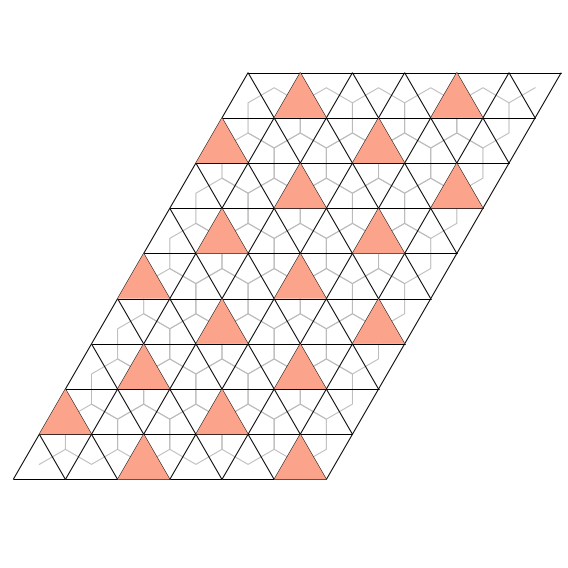

In [653]:
A = [
    (3 * x - y - 10, y * 2 - 8) for x in range(10) for y in range(10)
] + [
    (3 * x - y - 9, y * 2 - 8 + 1) for x in range(10) for y in range(10)
]

A = [i for i in A if i[0] >= 0 and i[0] < width and i[1] > 0 and i[1] <= height]

fig, ax = plt.subplots(1, 1, figsize=[8, 8])
draw_duallattice("#bbbbbb")
drawstate(A, [], [], "root3tri", lattice="tri", annotate_wf=(-1, -2))


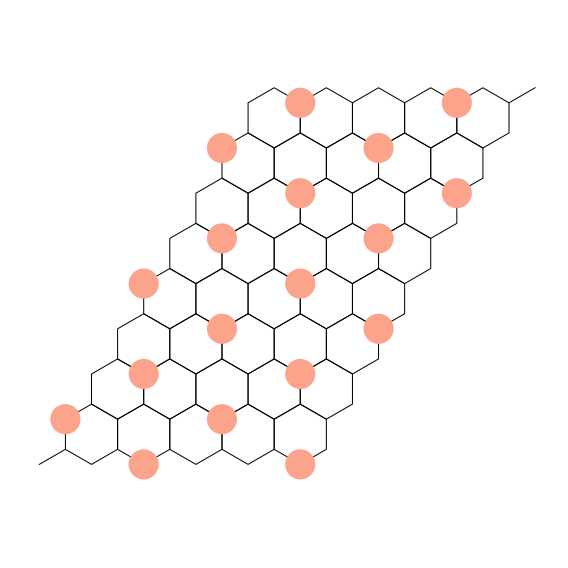

In [654]:
fig, ax = plt.subplots(1, 1, figsize=[8, 8])
drawstate(A, [], [], "root3hex", "hexa", wf="hexa", annotate_wf=(-1, -2))


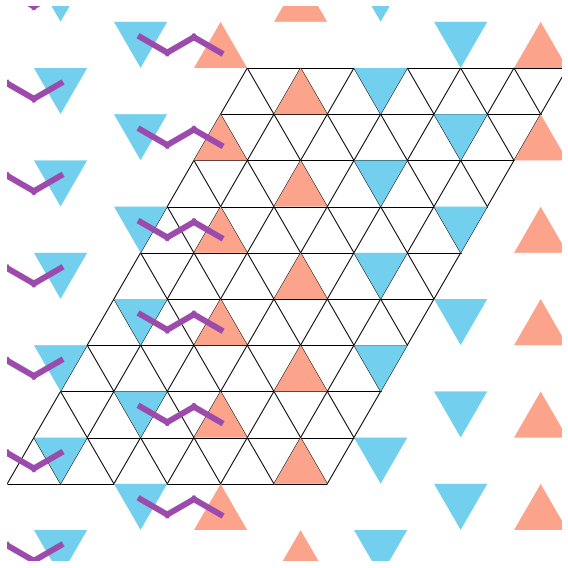

In [645]:
A = [
    (6 * x - y - 10, y * 2 - 8) for x in range(10) for y in range(10)
] + [
    (6 * x - y - 9, y * 2 - 8 + 1) for x in range(10) for y in range(10)
]

B = [
    (6 * x - y - 8, y * 2 - 8 + 1) for x in range(10) for y in range(10)
] + [
    (6 * x - y - 7, y * 2 - 8 + 2) for x in range(10) for y in range(10)
]

J4 = [
    (21 + i, 110 + i) for i in range(9)
] + [
    (121 + i, 21 + i) for i in range(9)
] + [
    (31 + i, 120 + i) for i in range(9)
] + [
    (111 + i, 11 + i) for i in range(9)
]

fig, ax = plt.subplots(1, 1, figsize=[8, 8])
#draw_hexalattice("#dddddd")
drawstate(A, B, J4, "fig3b1", "tri", annotate_j4=[2], annotate_wf=(-1, -2))

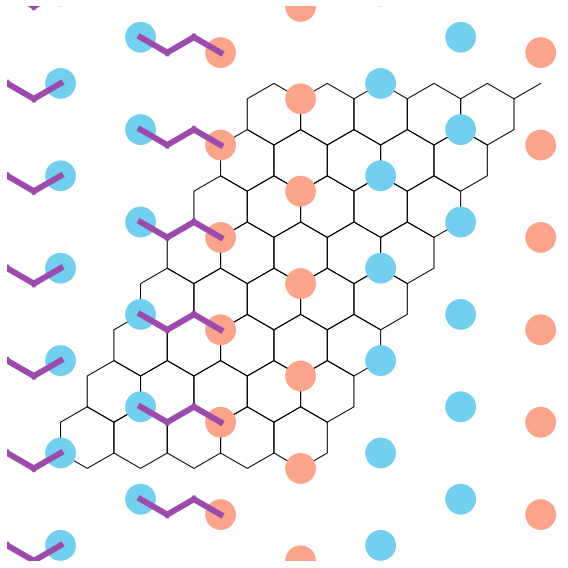

In [646]:
fig, ax = plt.subplots(1, 1, figsize=[8, 8])
drawstate(A, B, J4, "fig3b2", "hexa", "hexa", annotate_j4=[2], annotate_wf=(-1, -2))

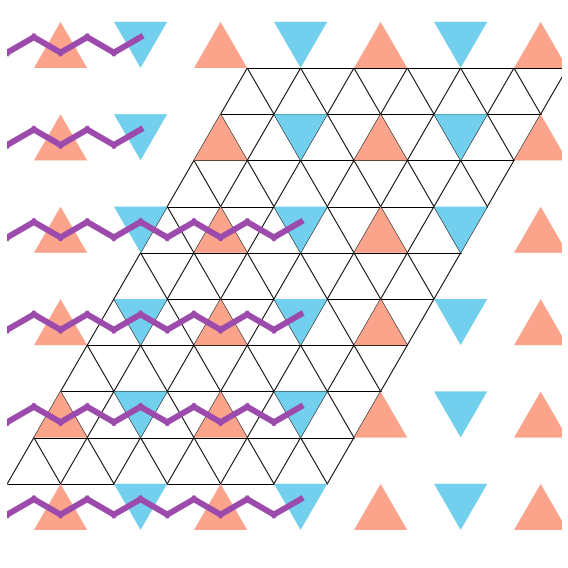

In [647]:
A = [
    (3 * x - y - 10, y * 2 - 8) for x in range(10) for y in range(10)
]

B = [
    (3 * x - y - 9, y * 2 - 8) for x in range(10) for y in range(10)
]

J4 = [
    (i, i) for i in range(21, 68)
] + [
    (i, i - 10) for i in range(31, 68)
]

fig, ax = plt.subplots(1, 1, figsize=[8, 8])
#draw_hexalattice("#dddddd")
drawstate(A, B, J4, "fig3c1", "tri", annotate_j4=[22, 68-21+12], annotate_wf=(-1, -2))

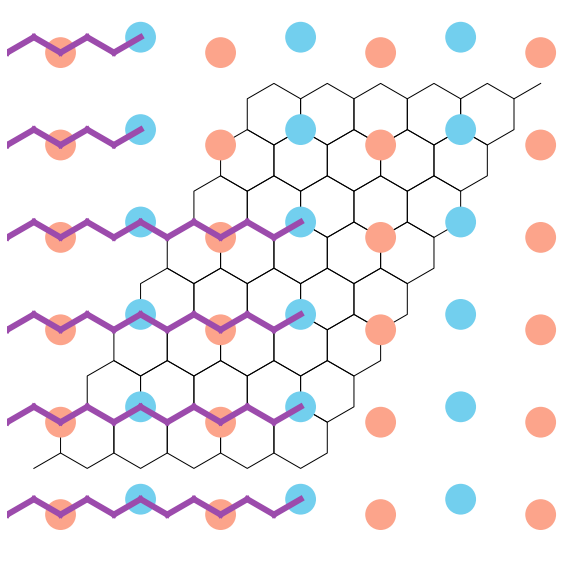

In [648]:
fig, ax = plt.subplots(1, 1, figsize=[8, 8])
drawstate(A, B, J4, "fig3c2", lattice="hexa", wf="hexa", annotate_j4=[22, 68-21+12], annotate_wf=(-1, -2))

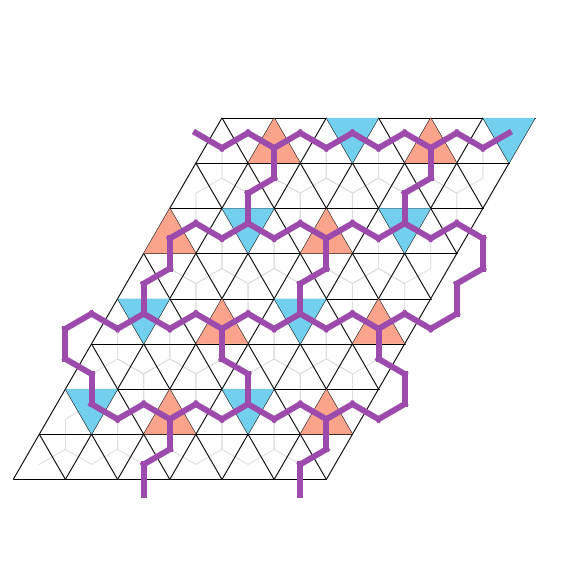

In [659]:
A = [
    (3 * x - y - 10 + y, y * 2 - 8) for x in range(10) for y in range(10)
]

B = [
    (3 * x - y - 9 + y, y * 2 - 8) for x in range(10) for y in range(10)
]

height = 8
width = 6


J4 = [
    (i, i) for i in range(0, 68)
] + [
    (i, i - 10) for i in range(10, 68)
] + [
    (i + j * 10, i - 1 + j * 10) for i in range(1, 9) for j in range(5)
]

A = [(2, 2), (5, 2), (2, 4), (5, 4), (0, 6), (3, 6), (1, 8), (4, 8)]
B = [(0, 2), (3, 2), (0, 4), (3, 4), (1, 6), (4, 6), (2, 8), (5, 8)]
J4 = [(i, i) for i in range(8)] + [(0, 1), (2, 3), (5, 4), (7, 6)] + [(2, 1), (4, 2), (5, 3), (6, 4), (7, 5)]


fig, ax = plt.subplots(1, 1, figsize=[8, 8])
draw_hexalattice("#dddddd")
for a, b in [
    ((2, 2), (2, 0)),
    ((5, 2), (5, 0)),
    ((5, 2), (6, 2)),
    ((-1, 4), (0, 2)),
    ((-1, 4), (0, 4)),
    ((5, 4), (6, 2)),
    ((5, 4), (6, 4)),
    ((6, 6), (6, 4)),
    ((6, 6), (4, 6)),
    ((1, 8), (-1, 8)),
]:
    Axy = trilatloc(a, "up")
    Bxy = trilatloc(b, "down")
    j4bondlineabs(Axy, Bxy, 6, R)



drawstate(A, B, J4, "j4gstri", "tri", annotate_j4=[33, 68+23, 68+58+13], annotate_wf=(-1, -2))
draw_duallattice("#dddddd")

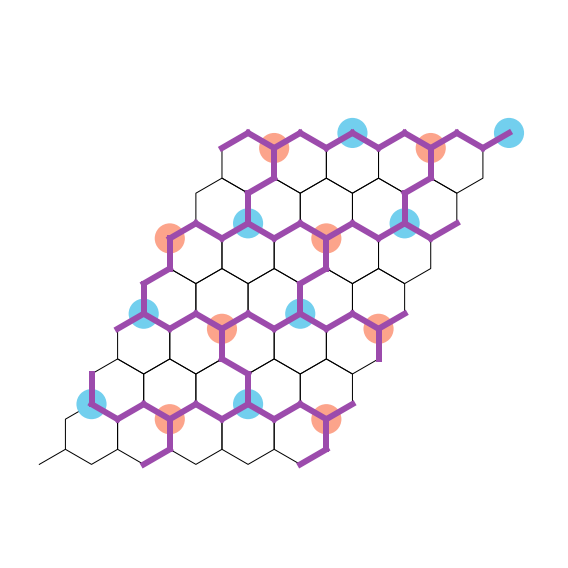

In [656]:
fig, ax = plt.subplots(1, 1, figsize=[8, 8])
for a, b, do in [
    ((2, 2), (2, 0), [1, 2]),
    ((5, 2), (5, 0), [1, 2]),
    ((5, 2), (6, 2), [0]),
    ((-1, 4), (0, 2), [0]),
    ((-1, 4), (0, 4), [2]),
    ((5, 4), (6, 2), [2]),
    ((5, 4), (6, 4), [0]),
    #((6, 6), (6, 4), [2]),
    ((6, 6), (4, 6), [2, 1]),
    ((1, 8), (-1, 8), [0, 1]),
]:
    Axy = trilatloc(a, "up")
    Bxy = trilatloc(b, "down")
    j4bondlineabs(Axy, Bxy, 6, R, do)
drawstate(A, B, J4, "j4gshex", lattice="hexa", wf="hexa", annotate_j4=[33, 68+23, 68+58+13], annotate_wf=(-1, -2))

TypeError: adddowntri() takes 2 positional arguments but 3 were given

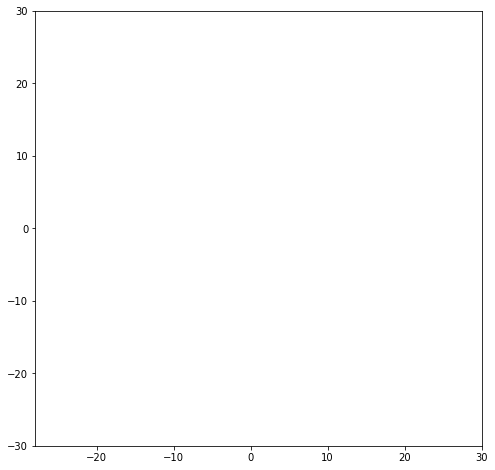

In [476]:
fig, ax = plt.subplots(1, 1, figsize=[8, 8])
ax.set_xlim([-28, 30])
ax.set_ylim([-30, 30])


def draw_duallattice():
    from matplotlib import collections as mc
    Dual = []
    DualLines = []

    for y in range(-2, 3):
        if y == 2: lim = (0, 9)
        elif y == 1: lim = (0, 11)
        elif y == 0: lim = (0, 12)
        elif y == -1: lim = (-1, 10)
        elif y == -2: lim = (-1, 8)
            
        for x in range(*lim):
            Dual.append(
                (
                    latticeconstant * np.sqrt(3) * (x - 5) / 2 + latticeconstant * np.sqrt(3) / 2 * abs(y),
                    (latticeconstant * np.sqrt(3) * y * np.sqrt(3) / 2 -
                         (latticeconstant * np.sqrt(3) / np.sqrt(3) if x % 2 == 0 else latticeconstant * np.sqrt(3) * np.sqrt(3) / 2 - latticeconstant * np.sqrt(3) / np.sqrt(3))
                    ) +  latticeconstant / 2
                )
            )
            if x != lim[0]:
                DualLines.append((len(Dual) - 2, len(Dual) - 1))

    for i in range(5):
        DualLines.append((i * 2, i * 2 + 10))
    for i in range(6):
        DualLines.append((9 + i * 2, 9 + i * 2 + 11))
    for i in range(6):
        DualLines.append((21 + i * 2, 21 + i * 2 + 11))
    for i in range(5):
        DualLines.append((33 + i * 2, 33 + i * 2 + 10))
                
    ax.add_collection(mc.LineCollection([(Dual[x], Dual[y]) for x, y in DualLines], color='#555555', lw=2, ls=(0, (1, 1)), zorder=0.5))


trialpha = 0.6
adddowntri((-1, -1), to_rgba(colorAB, 0.6), "")
adddowntri((0, 1), to_rgba(colorAB, 0.6), "")
adddowntri((2, -1), to_rgba(colorAB, 0.6), "")
adduptri((0, -1), to_rgba(colorBA, 0.6), "")
adduptri((-2, 1), to_rgba(colorBA, 0.6), "")
adduptri((1, 1), to_rgba(colorBA, 0.6), "")

lineupdown((-1, -1), (0, -1))
lineupdown((-1, -1), (-2, 1))

lineupdown((0, 1), (-2, 1))
lineupdown((0, 1), (1, 1))

lineupdown((2, -1), (1, 1))
lineupdown((2, -1), (0, -1))


ax.axis('off')
ax.set_aspect('equal')
draw_duallattice()
plt.tight_layout()
plt.savefig(base_dir + "fig4b.png", dpi=100)
plt.savefig(base_dir + "fig4b.svg", dpi=100)